In [1]:
import tensorboard as tb
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import sys

In [2]:
def plot_runs(df, selected_runs, title=""):
     
	print(selected_runs)
	df = df[df['run'].isin(list(selected_runs.keys()))]
	df['run'] = df['run'].apply(lambda v: v.replace(v, selected_runs[v]))
	plt.figure(figsize=(16, 6))
	plt.subplot(1, 2, 1)
	# plt.ylim([60, 100])
	sns.lineplot(data=df, x="step", y="value", ci='sd', hue='run'
	             ).set_title(title)
	plt.ylabel("ep reward mean")
	plt.show()

In [3]:
def load_runs(path):

	df = pd.read_csv(path)
	df['run'] = df['run'].apply(lambda v: re.search('(.*)_(.*)_(.*)$', v).group(1))
	df['run'] = df['run'].apply(lambda v: v.split("/")[0])
	df = df[df['tag'] == "rollout/ep_rew_mean"]

	return df

In [4]:
def save_runs_to_tbdev(experiment_id, output_file):

	experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
	df = experiment.get_scalars()

	df.to_csv(output_file, index=False)

In [5]:
experiment_id = '8uDXrOMTQouLXRGGqg1KLA'
a2c_path = '../A2Cs.csv'
a2c_runs1 = {
           'A2C_SiaMlpPolicy_lr7e-05' : 'A2C SNN',
 		   'A2C_SiaMlpPolicy_lr7e-05_eplength20' : 'A2C SNN ep length 20',
 		   'A2C_SiaMlpPolicy_lr7e-05_eplength40' : 'A2C SNN ep length 40'
}
a2c_runs2 = {
 		   'A2C_SiaMlpPolicy_lr7e-05' : 'A2C SNN',
           'A2C_SiaMlpPolicy_lr7e-05_CB' : 'A2C SNN CB',
}
#save_runs_to_tbdev(experiment_id, a2c_path)



In [6]:

a2c_df = load_runs(a2c_path)

a2c_df.run.unique()

array(['A2C_SiaMlpPolicy_lr7e-04', 'A2C_SiaMlpPolicy_lr7e-05',
       'A2C_SiaMlpPolicy_lr7e-05_CB',
       'A2C_SiaMlpPolicy_lr7e-05_eplength20',
       'A2C_SiaMlpPolicy_lr7e-05_eplength40'], dtype=object)

{'A2C_SiaMlpPolicy_lr7e-05': 'A2C SNN', 'A2C_SiaMlpPolicy_lr7e-05_CB': 'A2C SNN CB'}


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


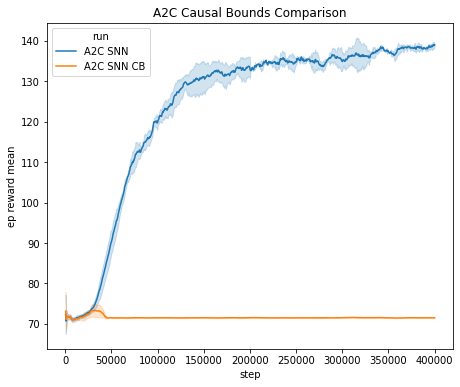

In [7]:
plot_runs(a2c_df, a2c_runs2, "A2C Causal Bounds Comparison")

{'A2C_SiaMlpPolicy_lr7e-05': 'A2C SNN', 'A2C_SiaMlpPolicy_lr7e-05_eplength20': 'A2C SNN ep length 20', 'A2C_SiaMlpPolicy_lr7e-05_eplength40': 'A2C SNN ep length 40'}


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


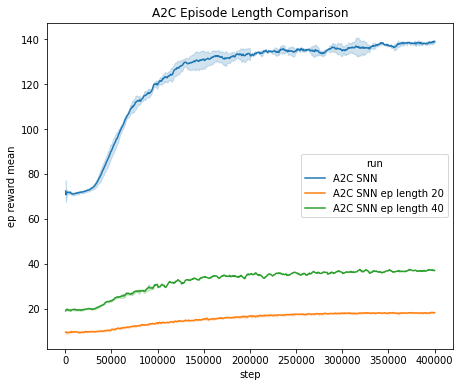

In [81]:
plot_runs(a2c_df, a2c_runs1, "A2C Episode Length Comparison")

In [72]:
experiment_id = 'pNFdNtZDR9e7TOy0Wlyslw'
path = '../PPOs.csv'
ppo_runs = {
		  # 'PPO_SiaMlpPolicy_lr7e-04',
 		   'PPO_SiaMlpPolicy_lr7e-05' : 'PPO Siamese',
 		   'PPO_SiaMlpPolicy_lr7e-05_CB' : 'PPO Siamese Causal Bounds'
}

In [73]:
ppo_df = load_runs(path)
ppo_df

,run,tag,step,value
49,PPO_SiaMlpPolicy_lr7e-04,rollout/ep_rew_mean,2048,71.857140
50,PPO_SiaMlpPolicy_lr7e-04,rollout/ep_rew_mean,4096,72.428574
51,PPO_SiaMlpPolicy_lr7e-04,rollout/ep_rew_mean,6144,71.642860
52,PPO_SiaMlpPolicy_lr7e-04,rollout/ep_rew_mean,8192,71.403511
53,PPO_SiaMlpPolicy_lr7e-04,rollout/ep_rew_mean,10240,71.760567
...,...,...,...,...
22502,PPO_SiaMlpPolicy_lr7e-05_CB,rollout/ep_rew_mean,393216,71.510002
22503,PPO_SiaMlpPolicy_lr7e-05_CB,rollout/ep_rew_mean,395264,71.459999
22504,PPO_SiaMlpPolicy_lr7e-05_CB,rollout/ep_rew_mean,397312,71.480003
22505,PPO_SiaMlpPolicy_lr7e-05_CB,rollout/ep_rew_mean,399360,71.449997


{'PPO_SiaMlpPolicy_lr7e-05': 'PPO Siamese', 'PPO_SiaMlpPolicy_lr7e-05_CB': 'PPO Siamese Causal Bounds'}


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


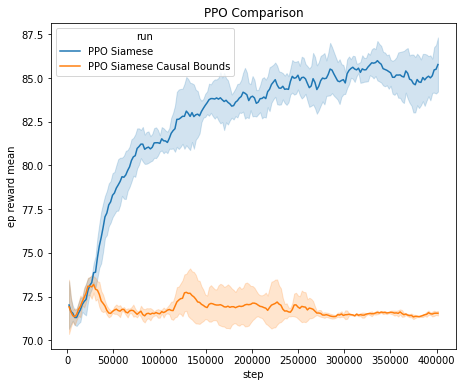

In [74]:
plot_runs(ppo_df, ppo_runs, "PPO Comparison")

In [39]:
ppo_a2c_df = pd.concat([ppo_df, a2c_df], ignore_index=True)
ppo_a2c_df

,run,tag,step,value
0,PPO_SiaMlpPolicy_lr7e-04,rollout/ep_rew_mean,2048,71.857140
1,PPO_SiaMlpPolicy_lr7e-04,rollout/ep_rew_mean,4096,72.428574
2,PPO_SiaMlpPolicy_lr7e-04,rollout/ep_rew_mean,6144,71.642860
3,PPO_SiaMlpPolicy_lr7e-04,rollout/ep_rew_mean,8192,71.403511
4,PPO_SiaMlpPolicy_lr7e-04,rollout/ep_rew_mean,10240,71.760567
...,...,...,...,...
12585,A2C_SiaMlpPolicy_lr7e-05_eplength40,rollout/ep_rew_mean,99000,31.139999
12586,A2C_SiaMlpPolicy_lr7e-05_eplength40,rollout/ep_rew_mean,99500,31.350000
12587,A2C_SiaMlpPolicy_lr7e-05_eplength40,rollout/ep_rew_mean,100000,31.750000
12588,A2C_SiaMlpPolicy_lr7e-05_eplength40,rollout/ep_rew_mean,500,18.833334


In [47]:
ppo_a2c_runs = {
 		   'PPO_SiaMlpPolicy_lr7e-05' : 'PPO',
           'A2C_SiaMlpPolicy_lr7e-05' : 'A2C'
}
ppo_a2c_df.run.unique()

array(['PPO_SiaMlpPolicy_lr7e-04', 'PPO_SiaMlpPolicy_lr7e-05',
       'PPO_SiaMlpPolicy_lr7e-05_CB', 'A2C_SiaMlpPolicy_lr7e-04',
       'A2C_SiaMlpPolicy_lr7e-05', 'A2C_SiaMlpPolicy_lr7e-05_CB',
       'A2C_SiaMlpPolicy_lr7e-05_eplength20',
       'A2C_SiaMlpPolicy_lr7e-05_eplength40'], dtype=object)

{'PPO_SiaMlpPolicy_lr7e-05': 'PPO', 'A2C_SiaMlpPolicy_lr7e-05': 'A2C'}


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


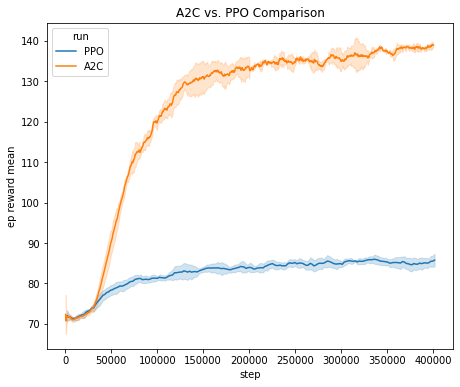

In [48]:
plot_runs(ppo_a2c_df, ppo_a2c_runs, "A2C vs. PPO Comparison")

In [57]:
experiment_id = 'WL1LLW8eQDOsVcD88QsjVA'
a2c_nosia_path = '../A2Cs_nosia.csv'

a2c_nosia_runs2 = {
 		   'A2C_MLP_env_64x64NN' : 'A2C',
           'A2C_SiaMlpPolicy_lr7e-05' : 'A2C Siamese'
    }
#save_runs_to_tbdev(experiment_id, a2c_nosia_path)
a2c_nosia_df = load_runs(a2c_nosia_path)
a2c_nosia_df = pd.concat([a2c_nosia_df, a2c_df], ignore_index=True)
a2c_nosia_df = a2c_nosia_df[a2c_nosia_df['step'] < 100000]


a2c_nosia_df.run.unique()

array(['A2C_MLP_env_64x64NN', 'A2C_SiaMlpPolicy_lr7e-04',
       'A2C_SiaMlpPolicy_lr7e-05', 'A2C_SiaMlpPolicy_lr7e-05_CB',
       'A2C_SiaMlpPolicy_lr7e-05_eplength20',
       'A2C_SiaMlpPolicy_lr7e-05_eplength40'], dtype=object)

{'A2C_MLP_env_64x64NN': 'A2C', 'A2C_SiaMlpPolicy_lr7e-05': 'A2C Siamese'}


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


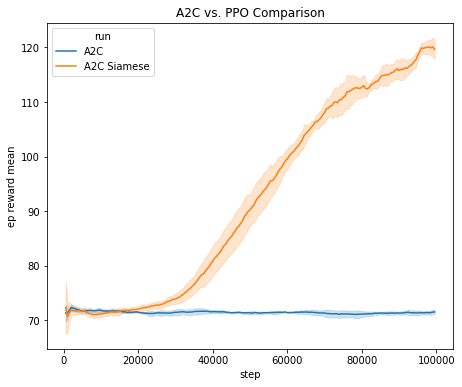

In [58]:
plot_runs(a2c_nosia_df, a2c_nosia_runs2, "A2C vs. A2C Siamese")

In [75]:
experiment_id = 'ZHviZymOQyGs5CkjZ1Dg7w'
ppo_nosia_path = '../PPOs_nosia.csv'

ppo_nosia_runs2 = {
 		   'PPO_MlpPolicy_lr7e-05' : 'PPO',
           'PPO_SiaMlpPolicy_lr7e-05' : 'PPO Siamese',
          # 'A2C_SiaMlpPolicy_lr7e-05' : 'A2C Siamese',
          # 'A2C_MLP_env_64x64NN' : 'A2C'
    }
#save_runs_to_tbdev(experiment_id, ppo_nosia_path)
ppo_nosia_df = load_runs(ppo_nosia_path)
ppo_nosia_df = pd.concat([ppo_nosia_df, ppo_df], ignore_index=True)
ppo_nosia_df = pd.concat([ppo_nosia_df, a2c_nosia_df], ignore_index=True)
ppo_nosia_df = ppo_nosia_df[ppo_nosia_df['step'] < 100000]


ppo_nosia_df.run.unique()

array(['PPO_MlpPolicy_lr7e-05', 'PPO_SiaMlpPolicy_lr7e-04',
       'PPO_SiaMlpPolicy_lr7e-05', 'PPO_SiaMlpPolicy_lr7e-05_CB',
       'A2C_MLP_env_64x64NN', 'A2C_SiaMlpPolicy_lr7e-04',
       'A2C_SiaMlpPolicy_lr7e-05', 'A2C_SiaMlpPolicy_lr7e-05_CB',
       'A2C_SiaMlpPolicy_lr7e-05_eplength20',
       'A2C_SiaMlpPolicy_lr7e-05_eplength40'], dtype=object)

{'PPO_MlpPolicy_lr7e-05': 'PPO', 'PPO_SiaMlpPolicy_lr7e-05': 'PPO Siamese'}


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


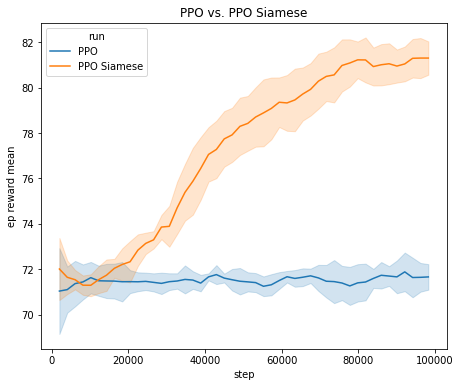

In [76]:
plot_runs(ppo_nosia_df, ppo_nosia_runs2, "PPO vs. PPO Siamese")